<a href="https://colab.research.google.com/github/Kereophillus/AI-Coursework-2026/blob/main/Week-02-Search-Algorithms/Search_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Map Setup

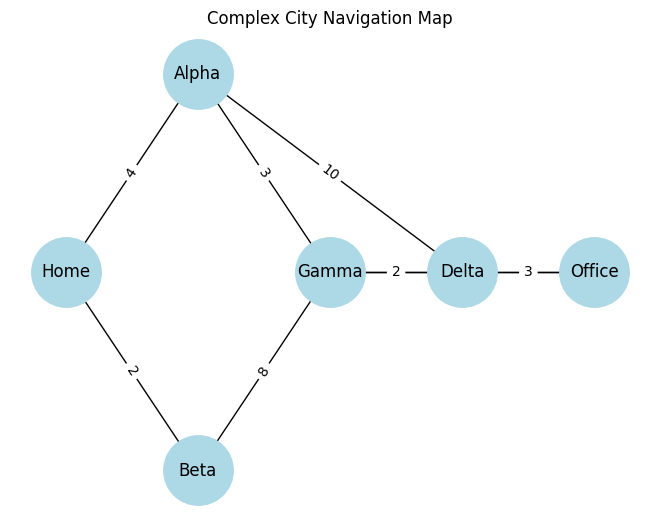

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the City Map
G = nx.Graph()

# Nodes: Home, Alpha, Beta, Gamma, Delta, Office
# Format: (Node1, Node2, Weight/Distance)
edges = [
    ('Home', 'Alpha', 4), ('Home', 'Beta', 2),
    ('Alpha', 'Gamma', 3), ('Beta', 'Gamma', 8),
    ('Alpha', 'Delta', 10), ('Gamma', 'Delta', 2),
    ('Delta', 'Office', 3), ('Gamma', 'Office', 9)
]

G.add_weighted_edges_from(edges)

# Define positions for a consistent look
pos = {
    'Home': (0, 1),
    'Alpha': (1, 2), 'Beta': (1, 0),
    'Gamma': (2, 1), 'Delta': (3, 1),
    'Office': (4, 1)
}

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Complex City Navigation Map")
plt.show()

In [14]:
start, goal = 'Home', 'Office'

# 1. BFS: Cares about the fewest "hops" (stops)
# It doesn't see the weights!
bfs_path = nx.shortest_path(G, source=start, target=goal)

# 2. DFS: Just explores. In NetworkX, dfs_tree shows the depth-first path
dfs_path = list(nx.dfs_preorder_nodes(G, source=start))
# Note: DFS might not even reach the goal efficiently; it just wanders.

# 3. A*: The Smart Navigator. It looks for the lowest total weight.
astar_path = nx.astar_path(G, start, goal, weight='weight')

print(f"BFS (Fewest Stops): {bfs_path}")
print(f"DFS (Fewest Stops): {dfs_path}")
print(f"A* (Shortest Distance): {astar_path}")

BFS (Fewest Stops): ['Home', 'Alpha', 'Gamma', 'Office']
DFS (Fewest Stops): ['Home', 'Alpha', 'Gamma', 'Beta', 'Delta', 'Office']
A* (Shortest Distance): ['Home', 'Alpha', 'Gamma', 'Delta', 'Office']
